# TISE Solver
---

The goal of this notebook is to take what was learned in the ode_playground.ipynb file and apply them to solve the SE for a range of possible potentials, for any number of energy levels (most accurately, the first 5 - 10).

We start with settuping up our differential equations and our integrator

We can solve the TISE by separating it into two functions. I.e: <br>
$$
    \frac{-\hbar^2}{2m}\frac{\partial^2 \psi}{\partial x^2} = (E-V)\psi
$$
Can be separated into two pieces
\begin{align*}
    \gamma_1' &= \gamma_2 \\
    \gamma_2' &= 2(E-V)\gamma_1
\end{align*}
Where we have taken $\hbar^2/m$ to be 1. In order to solve this, we can feed it into the $\texttt{scipy.integrate.odeint}$ function.

Below, we import some of the necessary packages we will need, as well as setup a quick example.

In [13]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy import optimize


## Example, Finite Square Well
---

We will initialize the potential well with v0 = 50 and a = 1 (units given by $\hbar^2/2m = 1$)

In [93]:
## some setup for the finite square well example
v0 = 50
a = 1
def solve_se_fsw(psi, x, e):
    v = 0 if np.abs(x) < a/2 else v0            # set v to be zero within the well, v0 outside it
    return [psi[1], -2 * (e - v) * psi[0]]      # return values with the solved ode

Now we can setup a function that will evaluate the solution to the TISE at a given energy level, and then return the value of the wave equation at the boundary condition.

In [94]:
def boundary(e, solve_se):
    x = np.linspace(-1.5, 1.5, 1000)  
    
    sol_se = odeint(solve_se, [0, 0.0001], x, args=(e,))              # solve the ode
    boundary_val = sol_se[:,0][-1]

    return boundary_val

Now, we can pass this into a root finder to determine what exact energy level satisfies the boundary condition.

In [95]:
sol = optimize.root(boundary, 4, args=(solve_se_fsw,)).x

Now we can go ahead and plot this

In [96]:
def plot_se(e, solve_se, psi_p_0, ylims=[-1, 4], sho=False, isw=False):
    x = np.linspace(-1.5, 1.5, 100)
    sol_se = odeint(solve_se, [0, psi_p_0], x, args=(e,)) 

    plt.plot(x, sol_se[:,0])

    if sho:
        plt.plot(x, 1/2 * x**2 * v0 - e, ls='--', lw=1)
    
    if isw:
        plt.axvline(x=a/2, ls='--', linewidth=1)
        plt.axvline(x=-a/2, ls='--', linewidth=1)

    plt.axhline(y=0, color='black', linewidth=0.5)
    plt.axvline(x=0, color='black', linewidth=0.5)

    plt.title("sol @ " + str(e))

    plt.xlabel("position (x)")
    plt.ylabel("wave function (psi(x))")

    plt.ylim(ylims)

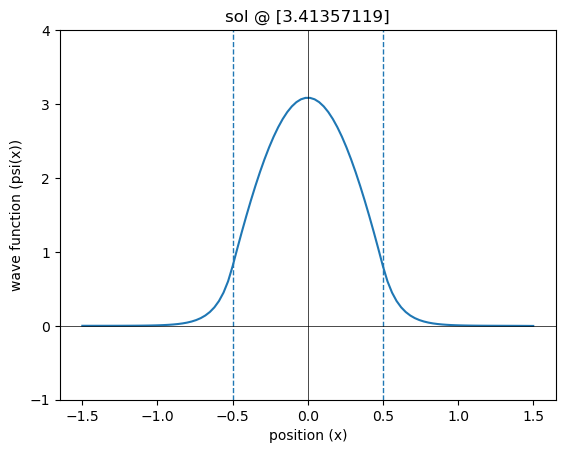

In [104]:
sol = optimize.root(boundary, 4, args=(solve_se_fsw,)).x
plot_se(sol, solve_se_fsw, 0.001, isw=True)

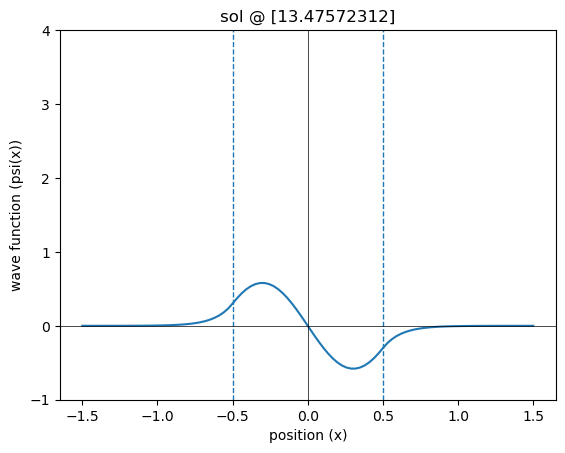

In [105]:
sol = optimize.root(boundary, 10, args=(solve_se_fsw,)).x
plot_se(sol, solve_se_fsw, 0.001, isw=True)

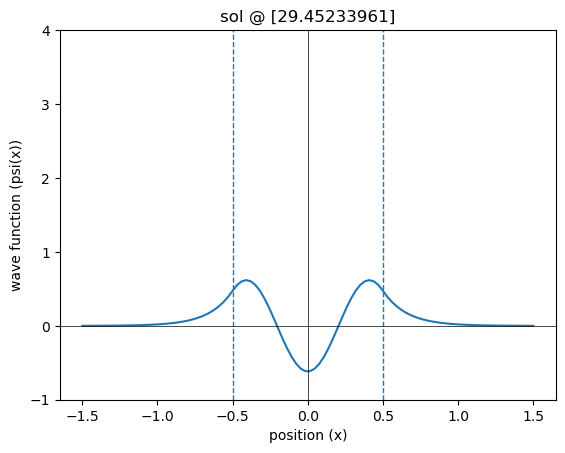

In [106]:
sol = optimize.root(boundary, 26, args=(solve_se_fsw,)).x
plot_se(sol, solve_se_fsw, 0.01, isw=True)

## Example, Simple Harmonic Oscillator

Now we hope to illustrate the first three energy levels of the simple harmonic oscillator potential.

We will paramterize the potential and ignore some constants in order to get:
$$ V(x) = \frac{1}{2}V_0x^2

In [100]:
def solve_se_sho(psi, x, e):
        v = 1/2 * x**2 * v0
        return [psi[1], -2 * (e - v) * psi[0]]      # return values with the solved ode

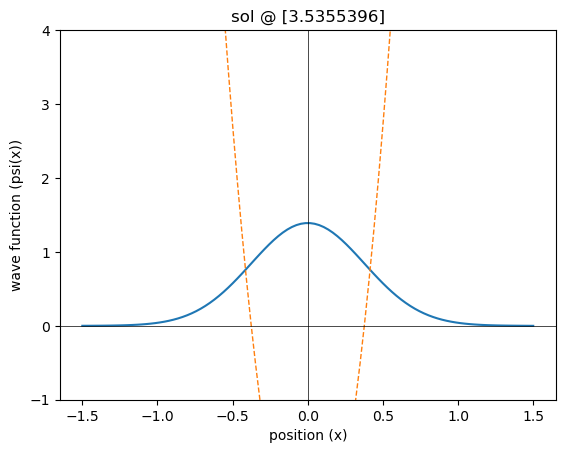

In [101]:
sol = optimize.root(boundary, 4, args=(solve_se_sho,)).x
plot_se(sol, solve_se_sho, 0.01, sho=True)

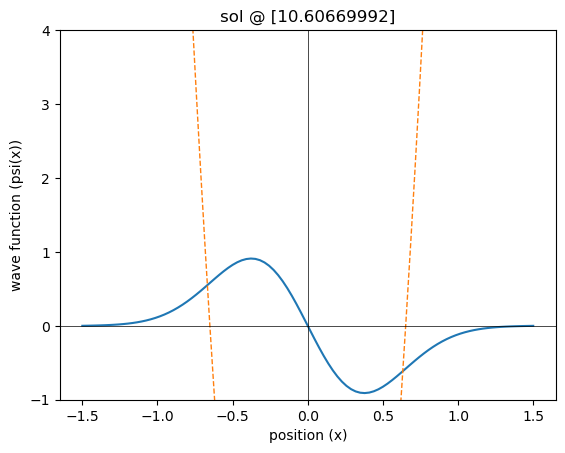

In [102]:
sol = optimize.root(boundary, 9, args=(solve_se_sho,)).x
plot_se(sol, solve_se_sho, 0.04, sho=True)

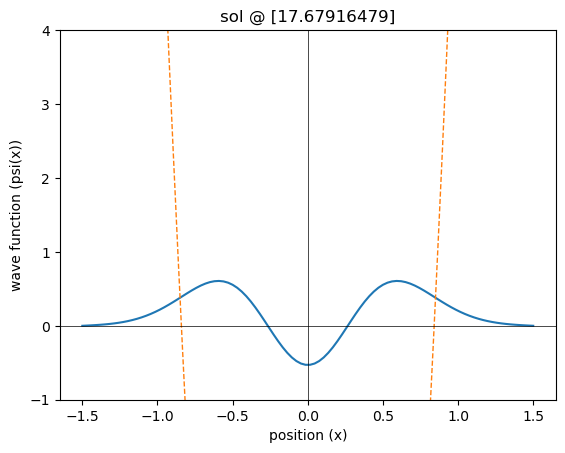

In [103]:
sol = optimize.root(boundary, 16, args=(solve_se_sho,)).x
plot_se(sol, solve_se_sho, 0.1, sho=True)